Drop of a control rod in the guide tube with annular gap flow


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
# Constants
g = 9.81  # Gravitational acceleration in m/s^2
rho = 998  # Density of water in kg/m^3
Ct = 0.3395  # Turbulent geometric parameter for non-circular pipes
nu = 1.003 * 10**(-6)  # Kinematic viscosity of fluid in m^2/s
CD = 1.2  # Drag coefficient for Re in 10^3 < Re < 10^5
R = 0.1  # Radius of guide tube in meters
r = 0.05  # Radius of control rod in meters
d_cr = 1200  # Density of control rod (kg/m^3)
l_cr = 1.6  # Length of CR (m)
m = d_cr * (np.pi * r**2 * l_cr)  # Mass of CR (kg)

In [11]:
# Calculations
alpha = r / R  # Blockage ratio
k = (R**2 + r**2) / (R**2 - r**2)  # Added mass coefficient
Area = np.pi * r**2  # Cross-sectional area of control rod
DE = R - r  # Equivalent diameter of the annular gap

# Volume of the control rod immersed in fluid
def volume_immersed(y):
    return y * Area

# Modified velocity
def modified_velocity(dy_dt):
    Va = (r**2 / (R**2 - r**2)) * dy_dt
    return dy_dt + Va

# Inertial force
def inertial_force(y, dy_dt2):
    V_B = volume_immersed(y)
    m_prime = k * rho * V_B
    return m_prime * dy_dt2

# Viscous drag force
def viscous_drag(dy_dt, y, DE):
    v = modified_velocity(dy_dt)
    Re = v * DE / nu
    f = Ct * (Re**-0.25) if Re > 0 else 0
    return f * y / DE * 0.5 * rho * v**2 * Area

# Pressure drag force
def pressure_drag(dy_dt):
    v = modified_velocity(dy_dt)
    return CD * 0.5 * rho * v**2 * Area

# Equation of motion
def equation_of_motion(y, dy_dt, m, k, g, rho, DE, Area):
    G = m * g
    FB = rho * volume_immersed(y) * g
    Fa = inertial_force(y, dy_dt)
    Ff = viscous_drag(dy_dt, y, DE)
    Fp = pressure_drag(dy_dt)
    return (G - FB - Fa - Ff - Fp) / m

# Initial conditions
y_initial = 0
dy_dt_initial = 0
dt = 0.001
time = np.arange(0, 1.5, dt)

y = np.zeros_like(time)
dy_dt = np.zeros_like(time)
d2y_dt2 = np.zeros_like(time)

y[0] = y_initial
dy_dt[0] = dy_dt_initial
d2y_dt2[0] = g

In [12]:
# Numerical integration
stop_index = len(time)

for i in range(1, len(time)):
    d2y_dt2[i] = equation_of_motion(y[i-1], dy_dt[i-1], m, k, g, rho, DE, Area)
    dy_dt[i] = dy_dt[i-1] + d2y_dt2[i] * dt
    y[i] = y[i-1] + dy_dt[i] * dt
    if y[i] > 1.25:
        stop_index = i
        break

# Save data to a CSV file
data = {
    "Time (s)": time[:stop_index],
    "Displacement (m)": y[:stop_index],
    "Velocity (m/s)": dy_dt[:stop_index]
}

df = pd.DataFrame(data)
csv_filename = "displacement_velocity.csv"
df.to_csv(csv_filename, index=False)

# Download the CSV file
from google.colab import files
files.download(csv_filename)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

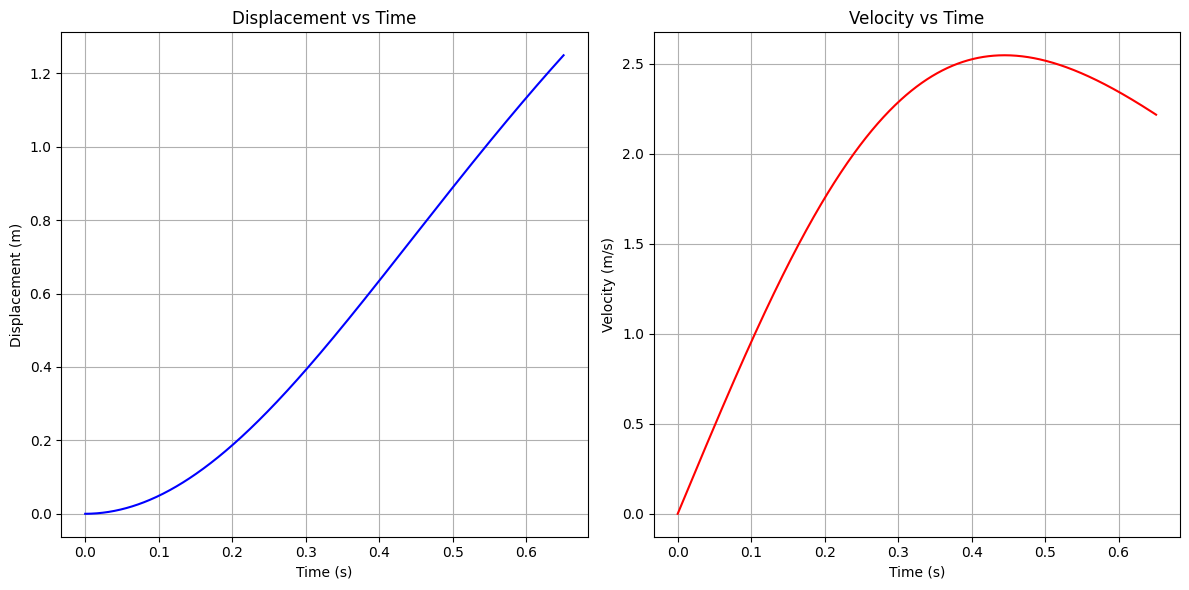

In [13]:

# Plot results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(time[:stop_index], y[:stop_index], label='Displacement (y)', color='blue')
plt.title('Displacement vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Displacement (m)')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(time[:stop_index], dy_dt[:stop_index], label='Velocity (dy/dt)', color='red')
plt.title('Velocity vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.grid(True)

plt.tight_layout()
plt.show()



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
# Constants (same as in your code)
g = 9.81  # Gravitational acceleration in m/s^2
rho = 998  # Density of water in kg/m^3
Ct = 0.3395  # Turbulent geometric parameter for non-circular pipes
nu = 1.003 * 10**(-6)  # Kinematic viscosity of fluid in m^2/s
CD = 1.2  # Drag coefficient for Re in 10^3 < Re < 10^5
R = 0.1  # Radius of guide tube in meters
r = 0.05  # Radius of control rod in meters
d_cr = 1200  # Density of control rod (kg/m^3)
l_cr = 1.6  # Length of CR (m)
m = d_cr * (np.pi * r**2 * l_cr)  # Mass of CR (Kg)

In [14]:
# Blockage ratio
alpha = r / R

# Calculate the added mass coefficient (k)
k = (R**2 + r**2) / (R**2 - r**2)

# Area of the control rod's cross-section
Area = np.pi * r**2

# Equivalent diameter (DE) of the annular gap
DE = R - r  # Equivalent diameter of the annular gap

# Volume of control rod immersed in fluid (V_B)
def volume_immersed(y):
    return y * Area  # Volume = y * Area

# Calculate v using the modified equation
def modified_velocity(dy_dt):
    Va = (r**2 / (R**2 - r**2)) * dy_dt
    vw = Va  # Since gamma = 1
    return dy_dt + vw

# Inertial force (Fa)
def inertial_force(y, dy_dt2):
    V_B = volume_immersed(y)
    m_prime = k * rho * V_B  # Added mass (m_prime)
    return m_prime * dy_dt2  # Fa = m_prime * d2y/dt2

# Viscous drag force (f)
def viscous_drag(dy_dt, y, DE):
    v = modified_velocity(dy_dt)  # Use the modified velocity for viscous drag calculations
    Re = v * DE / nu  # Reynolds number based on the modified velocity
    if Re > 0:  # Ensure Re is positive
        f = Ct * (Re**-0.25)   # Friction factor
    else:
        f = 0  # Set friction factor to 0 if Re is non-positive
    return f * y / DE * 0.5 * rho * v**2 * Area  # Viscous drag based on modified velocity

# Pressure drag (Fp)
def pressure_drag(dy_dt):
    v = modified_velocity(dy_dt)  # Use modified velocity
    return CD * 0.5 * rho * v**2 * Area

# Equation of motion
def equation_of_motion(y, dy_dt, m, g, rho, DE, Area):
    # Gravitational force
    G = m * g
    # Buoyancy force
    FB = rho * volume_immersed(y) * g
    # Fluid forces (inertial, viscous, pressure drag)
    Fa = inertial_force(y, dy_dt)  # Inertial force
    Ff = viscous_drag(dy_dt, y, DE)  # Viscous drag with modified v
    Fp = pressure_drag(dy_dt)  # Pressure drag with modified v
    # Equation of motion
    d2y_dt2 = (G - FB - Fa - Ff - Fp) / m  # Return d2y/dt^2
    return d2y_dt2

# Function to perform the simulation with a given time step
def simulate(dt):
    time = np.arange(0, 1.5, dt)  # Time array
    y = np.zeros_like(time)
    dy_dt = np.zeros_like(time)
    d2y_dt2 = np.zeros_like(time)
    forces = {
        'G': np.zeros_like(time),  # Gravitational force
        'FB': np.zeros_like(time),  # Buoyancy force
        'Fa': np.zeros_like(time),  # Inertial force
        'Ff': np.zeros_like(time),  # Viscous drag
        'Fp': np.zeros_like(time),  # Pressure drag
        'net': np.zeros_like(time)  # Net force
    }

    # Initial conditions
    y[0] = 0  # Starting at the top of the guide tube
    dy_dt[0] = 0  # Initial velocity (at t=0)
    d2y_dt2[0] = g  # Initial acceleration due to gravity

    # Numerical integration using Euler's method
    stop_index = len(time)
    for i in range(1, len(time)):
        # Calculate acceleration using the equation of motion
        d2y_dt2[i] = equation_of_motion(y[i-1], dy_dt[i-1], m, g, rho, DE, Area)

        # Update velocity and displacement
        dy_dt[i] = dy_dt[i-1] + d2y_dt2[i] * dt
        y[i] = y[i-1] + dy_dt[i] * dt

        # Calculate forces at each step
        forces['G'][i] = m * g
        forces['FB'][i] = rho * volume_immersed(y[i]) * g
        forces['Fa'][i] = inertial_force(y[i], dy_dt[i])
        forces['Ff'][i] = viscous_drag(dy_dt[i], y[i], DE)
        forces['Fp'][i] = pressure_drag(dy_dt[i])

        # Calculate the net force (m * a)
        forces['net'][i] = m * d2y_dt2[i]

        # Stop if rod reaches the bottom (y = 1.25 m)
        if y[i] >= 1.25:
            stop_index = i
            break

    return time[:stop_index], forces

# Run simulation with a given time step
time_step = 0.001  # Time step
time, forces = simulate(time_step)

# Create a DataFrame to display the forces at different time steps
force_data = {
    'Time (s)': time,
    'Gravitational Force (N)': forces['G'][:len(time)],
    'Buoyancy Force (N)': forces['FB'][:len(time)],
    'Inertial Force (N)': forces['Fa'][:len(time)],
    'Viscous Drag Force (N)': forces['Ff'][:len(time)],
    'Pressure Drag Force (N)': forces['Fp'][:len(time)],
    'Net Force (N)': forces['net'][:len(time)]
}

df_forces = pd.DataFrame(force_data)

# Set pandas option to display all rows
pd.set_option('display.max_rows', None)  # Allow display of all rows

# Display the table
print(df_forces)

# Optionally, you can save the table to a CSV file for future reference
df_forces.to_csv("forces_table.csv", index=False)

print(df_forces.head())  # To check the first few rows of the DataFrame
df_forces.to_csv("forces_table.csv", index=False)
from google.colab import files
files.download("forces_table.csv")


     Time (s)  Gravitational Force (N)  Buoyancy Force (N)  \
0       0.000                 0.000000            0.000000   
1       0.001               147.931315            0.000754   
2       0.002               147.931315            0.002263   
3       0.003               147.931315            0.004526   
4       0.004               147.931315            0.007543   
5       0.005               147.931315            0.011315   
6       0.006               147.931315            0.015840   
7       0.007               147.931315            0.021120   
8       0.008               147.931315            0.027154   
9       0.009               147.931315            0.033941   
10      0.010               147.931315            0.041483   
11      0.011               147.931315            0.049778   
12      0.012               147.931315            0.058826   
13      0.013               147.931315            0.068629   
14      0.014               147.931315            0.079184   
15      

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

SMR-220 MWe